<div style="width: 50%; float: left">
    <img src="../../../../ups.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>NRO. PRUEBA: </strong>1
    <br>
    <strong>ESTUDIANTE: </strong>Doménica Merchán García
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">PRUEBA PRÁCTICA</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Prueba Práctica Unidad 1
    <br>
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Generar gráficas para entender y procesar los datos:

- Gráficas y reportes del total de personas vacunadas

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/vacunas.csv')
FMT = '%d/%m/%Y'
date = df['fecha']
df['fecha_no'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("29/12/2020", FMT)).days)

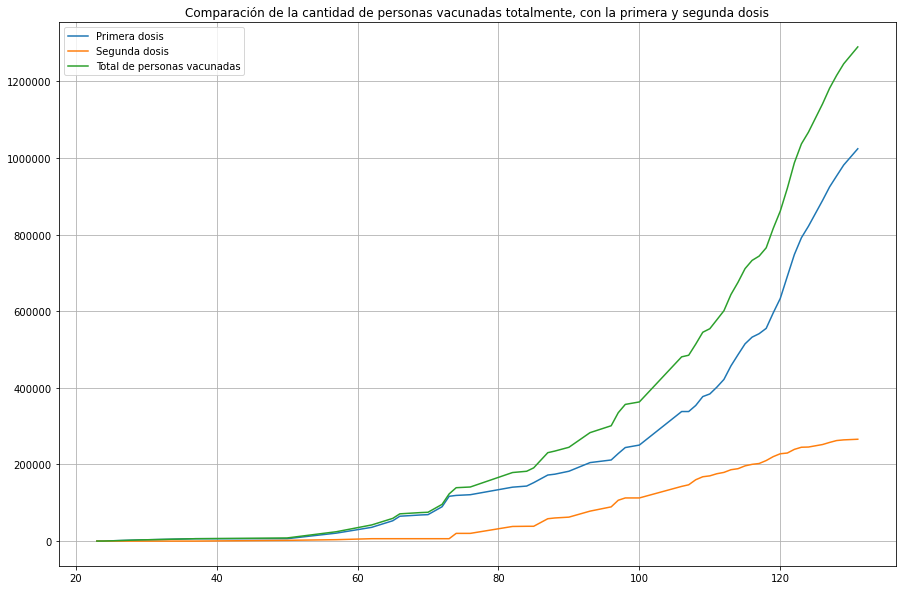

In [94]:
plt.figure(figsize=(15,10))
plt.grid(True)

plt.plot(df['fecha_no'], df['primera_dosis'], label='Primera dosis')
plt.plot(df['fecha_no'], df['segunda_dosis'], label='Segunda dosis')
plt.plot(df['fecha_no'], df['dosis_total'], label='Total de personas vacunadas')
plt.title('Comparación de la cantidad de personas vacunadas totalmente, con la primera y segunda dosis')
try:
    plt.ticklabel_format(style='plain')
except AttributeError:
    print('')
plt.legend(loc='upper left')
plt.show()

- Gráfico de pie por fabricante de la vacuna

In [95]:
df_fab = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/fabricantes.csv')

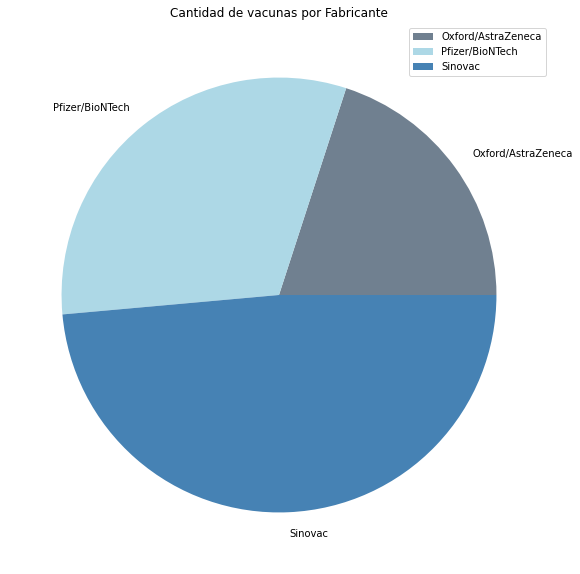

In [96]:
df_pie = df_fab.groupby(['vaccine']).sum()
df_pie.index
colors = ['slategray', 'lightblue', 'steelblue']
plt.figure(figsize=(10,10))
plt.title('Cantidad de vacunas por Fabricante')
plt.pie(df_pie['total'], labels=df_pie.index, startangle = 0, colors=colors)
plt.legend()
plt.show()

- Histograma de vacunas por mes de llegada y fabricante

Se realiza una gráfica indicando la cantidad de vacunas que llegan al Ecuador, clasificadas por fabricante. En la primera gráfica se presenta la cantidad de vacunas por día y en la segunda por mes.

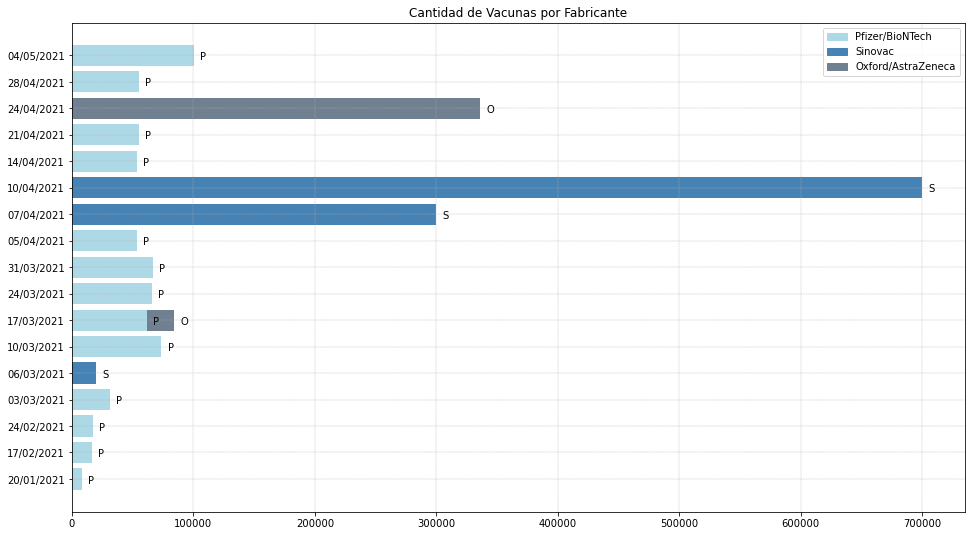

In [97]:
fig, ax = plt.subplots(figsize =(16, 9))
colors = ['lightblue' if i == 'Pfizer/BioNTech' else 'steelblue' if i == 'Sinovac' else 'slategray' for i in df_fab['vaccine'] ]

ax.barh(df_fab['arrived_at'], df_fab['total'], color=colors)
plt.grid(linestyle='--', linewidth=0.4)

for i, el in enumerate(ax.patches):
    plt.text(el.get_width() + 5000, el.get_y() + 0.25, str(df_fab['vaccine'][i])[0] )

l = mpatches.Patch(color='lightblue', label='Pfizer/BioNTech')
s = mpatches.Patch(color='steelblue', label='Sinovac')
a = mpatches.Patch(color='slategray', label='Oxford/AstraZeneca')
plt.legend(handles=[l, s, a])
plt.title('Cantidad de Vacunas por Fabricante')
plt.show()

In [98]:
df_h = df_fab
df_h['month'] = [i[3:5] for i in df_h['arrived_at']]
df_h = df_h.drop(['arrived_at'], axis=1)
dfh = df_h.groupby(['month', 'vaccine']).sum()

In [99]:
mes = ['Enero' if i[0] == '01' else 'Febrero'if i[0] == '02' else 'Marzo' if i[0] == '03' else 'Abril' if i[0] == '04' else 'Mayo' for i in dfh.index]
fab = [i[1] for i in dfh.index]

dfh['mes'] = mes
dfh['fab'] = fab
dfh = dfh.sort_values(by=['total'], ascending=False)
dfh.reset_index(drop=True, inplace=True)

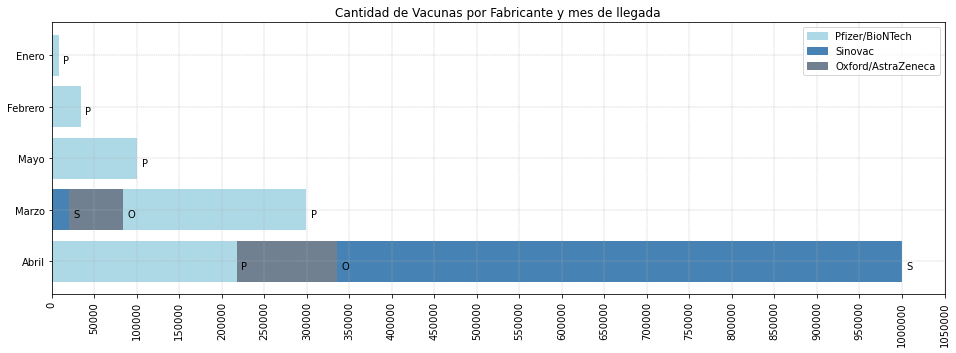

In [101]:
fig, ax = plt.subplots(figsize =(16, 5))
colors = ['lightblue' if i == 'Pfizer/BioNTech' else 'steelblue' if i == 'Sinovac' else 'slategray' for i in dfh['fab'] ]

ax.barh(dfh['mes'], dfh['total'], color=colors)
plt.grid(linestyle='--', linewidth=0.4)

for i, el in enumerate(ax.patches):
    plt.text(el.get_width() + 5000, el.get_y() + 0.25, str(dfh['fab'][i])[0] )

l = mpatches.Patch(color='lightblue', label='Pfizer/BioNTech')
s = mpatches.Patch(color='steelblue', label='Sinovac')
a = mpatches.Patch(color='slategray', label='Oxford/AstraZeneca')
plt.xticks(np.arange(0, 1100000, step=50000), rotation=90)
plt.legend(handles=[l, s, a])
try:
    plt.ticklabel_format(style='plain')
except AttributeError:
    print('')
plt.title('Cantidad de Vacunas por Fabricante y mes de llegada')
plt.show()

De acuerdo con la gráfica, el mes de abril fue cuando llegaron más vacunas al país.

### Generar un reporte parametrizado

Se genera un reporte sobre los datos analizados anteriormente, se indica la cantidad de personas vacunadas con la primera dosis, segunda dosis, la cantidad de vacunas puestas, y la cantidad de vacunas disponibles en el país. Como parámetros de entrada se recibe la fecha inicial y final para el reporte.

Ingrese fecha inicial: 01/01/2021
Ingrese fecha final: 01/05/2021

Primera dosis:  791822
Segunda dosis:  244972
Total dosis:  1036794
Número de vacunas:  1999260


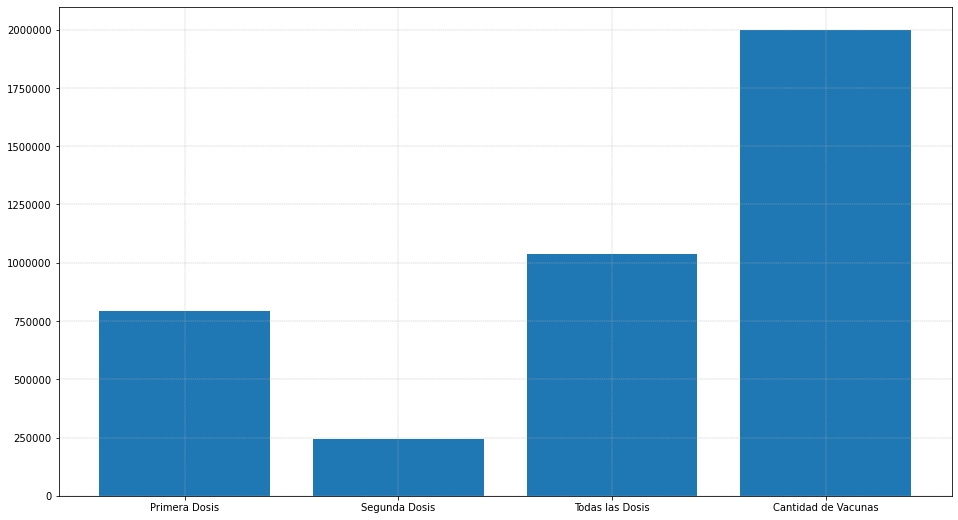

In [10]:
f1, f2 = input('Ingrese fecha inicial: '), input('Ingrese fecha final: ')
f1 = datetime.strptime(f1, '%d/%m/%Y')
f2 = datetime.strptime(f2, '%d/%m/%Y')


i1 = 0
i2 = df.index.stop-1
dosis1 = 0
dosis2 = 0
dosisT = 0
vacunas = 0 

for i, row in df.iterrows():
    f = row['fecha']
    f = datetime.strptime(f, '%d/%m/%Y')
    if f1 >= f:
        i1 = i-1
    if f2 < f:
        i2 = i-1
        break
print('')        
if i1 == -1:
    dosis1 = df['primera_dosis'][i2]
    dosis2 = df['segunda_dosis'][i2]
    dosisT = df['dosis_total'][i2]
    
else:
    dosis1 = df['primera_dosis'][i2] - df['primera_dosis'][i1]
    dosis2 = df['segunda_dosis'][i2] - df['segunda_dosis'][i1]
    dosisT = df['dosis_total'][i2] - df['dosis_total'][i1]
     
for i, row in df_fab.iterrows():
    f = row['arrived_at']
    f = datetime.strptime(f, '%d/%m/%Y')
    if f >= f1 and f < f2:
        vacunas += row['total']

print('Primera dosis: ', dosis1)
print('Segunda dosis: ', dosis2)
print('Total dosis: ', dosisT)
print('Número de vacunas: ', vacunas)

fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(['Primera Dosis', 'Segunda Dosis', 'Todas las Dosis', 'Cantidad de Vacunas'], [dosis1, dosis2, dosisT, vacunas])
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.grid(linestyle='--', linewidth=0.4)
plt.show()

Si se ingresan los datos desde el primero de enero del presente año hasta la fecha actual se puede apreciar cómo la cantidad de vacunas disponibles supera a la cantidad de vacunas puestas a los ciudadanos. 

### Generar un modelo matemático de predicción basado en regresión, del proceso de vacunación en base al número actual de vacunados y a la llegada de nuevas vacunas.

Se generan dos modelos de regresión, una regresión lineal y una polinómica de grado 4.

In [103]:
df_vac = df_fab
FMT = '%d/%m/%Y'
date = df_vac['arrived_at']
df_vac['fecha_no'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("29/12/2020", FMT)).days)

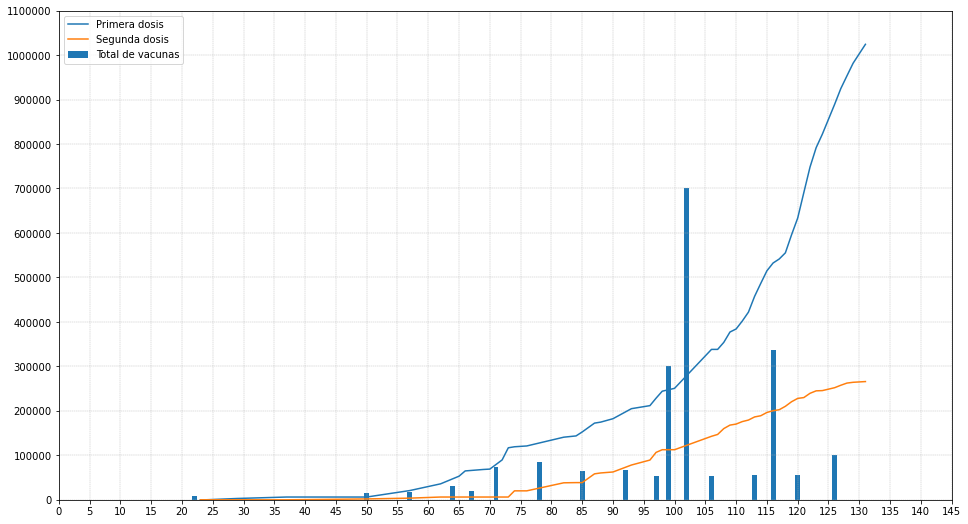

In [104]:
fig, ax = plt.subplots(figsize =(16, 9))
plt.plot(df['fecha_no'], df['primera_dosis'], label='Primera dosis')
plt.plot(df['fecha_no'], df['segunda_dosis'], label='Segunda dosis')
plt.bar(df_vac['fecha_no'], df_vac['total'], label='Total de vacunas')
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.grid(linestyle='--', linewidth=0.4)
plt.xticks(np.arange(0, 150, step=5))
plt.yticks(np.arange(0, 1200000, step=100000))
plt.legend(loc='upper left')
plt.show()

En la gráfica se muestran los datos reales de la primera y segunda dosis en el país, más la cantidad de vacunas disponibles. Luego se hace un entrenamiento y la predicción utilizando la regresión lineal y polinómica.

In [105]:
xtrainP, xtestP, ytrainP, ytestP = tts(df['fecha_no'], df['primera_dosis'], test_size=0.2)
xtrainS, xtestS, ytrainS, ytestS = tts(df['fecha_no'], df['segunda_dosis'], test_size=0.2)
xtrainV, xtestV, ytrainV, ytestV = tts(df_vac['fecha_no'], df_vac['total'], test_size=0.2)

In [106]:
model = LinearRegression()
model.fit(np.array(xtrainP).reshape(-1, 1), ytrainP)
p = np.poly1d(np.polyfit(xtrainP, ytrainP, 4))

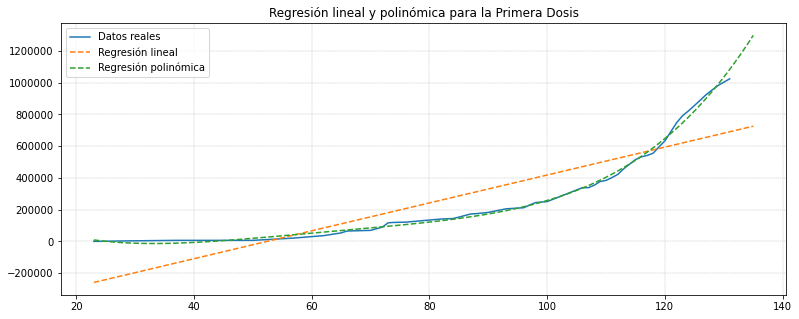

In [107]:
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])+5))
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(linestyle='--', linewidth=0.4)

plt.plot(df['fecha_no'], df['primera_dosis'], '-', label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.legend(loc='upper left')
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.title('Regresión lineal y polinómica para la Primera Dosis')
plt.show()

In [108]:
model = LinearRegression()
model.fit(np.array(xtrainS).reshape(-1, 1), ytrainS)
p = np.poly1d(np.polyfit(xtrainS, ytrainS, 4))

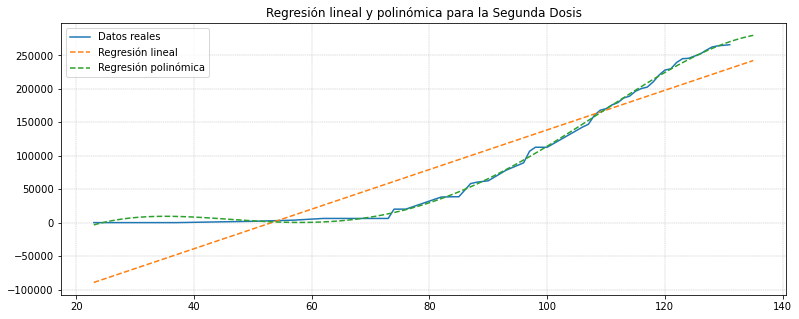

In [109]:
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])+5))
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(linestyle='--', linewidth=0.4)

plt.plot(df['fecha_no'], df['segunda_dosis'], '-', label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.title('Regresión lineal y polinómica para la Segunda Dosis')
plt.legend(loc='upper left')
plt.show()

In [110]:
model = LinearRegression()
model.fit(np.array(xtrainV).reshape(-1, 1), ytrainV)
p = np.poly1d(np.polyfit(xtrainV, ytrainV, 4))

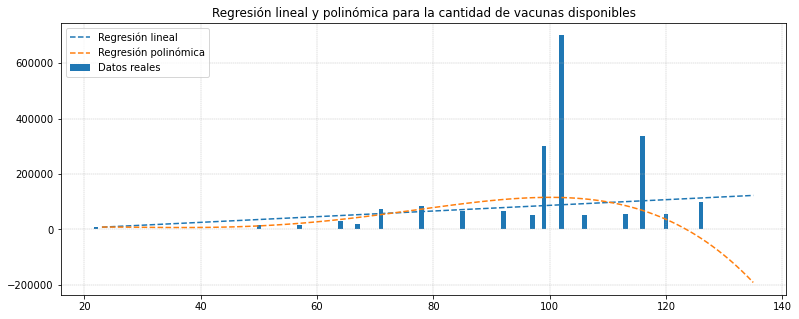

In [111]:
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])+5))
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(linestyle='--', linewidth=0.4)

plt.bar(df_vac['fecha_no'], df_vac['total'], label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.title('Regresión lineal y polinómica para la cantidad de vacunas disponibles')
plt.legend(loc='upper left')
plt.show()

Se puede apreciar que los modelos polinómicos se asemejan de mejor manera a los datos reales, a excepción del modelo para la cantidad de vacunas disponibles. En ese caso se tiene un overfitting que indica un descenso en la llegada de vacunas hasta datos menores a cero.

### Desarrollar y generar un proceso de comparación con al menos dos países (1. Latinoamérica,  1. Europa).

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv').loc[:, ['location', 'date', 'people_fully_vaccinated']]
df.dropna(inplace=True)
FMT = '%Y-%m-%d'
date = df['date']
df['fecha_no'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-12-29", FMT)).days)
dfL = df[df['location']=='Argentina']
dfE = df[df['location']=='Spain']
df = df[df['location']=='Ecuador']

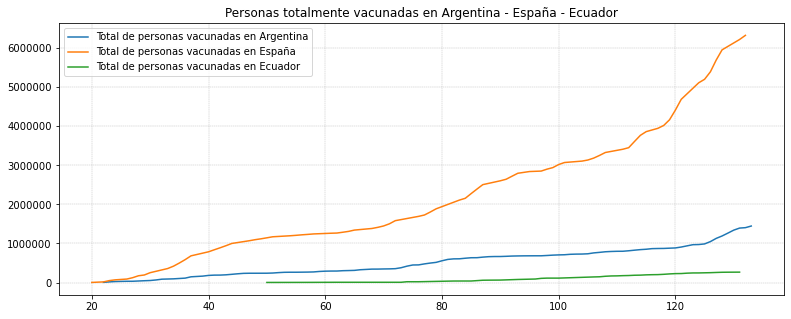

In [115]:
plt.figure(figsize=(13,5))
plt.plot(dfL['fecha_no'], dfL['people_fully_vaccinated'], label='Total de personas vacunadas en Argentina')
plt.plot(dfE['fecha_no'], dfE['people_fully_vaccinated'], label='Total de personas vacunadas en España')
plt.plot(df['fecha_no'], df['people_fully_vaccinated'], label='Total de personas vacunadas en Ecuador')
plt.legend(loc='upper left')
plt.grid(linestyle='--', linewidth=0.4)
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.title('Personas totalmente vacunadas en Argentina - España - Ecuador')
plt.show()

- Generar las gráficas de regresión y comparar

In [116]:
xtrainL, xtestL, ytrainL, ytestL = tts(dfL['fecha_no'], dfL['people_fully_vaccinated'], test_size=0.2)
xtrainE, xtestE, ytrainE, ytestE = tts(dfE['fecha_no'], dfE['people_fully_vaccinated'], test_size=0.2)
xtrain, xtest, ytrain, ytest = tts(df['fecha_no'], df['people_fully_vaccinated'], test_size=0.2)

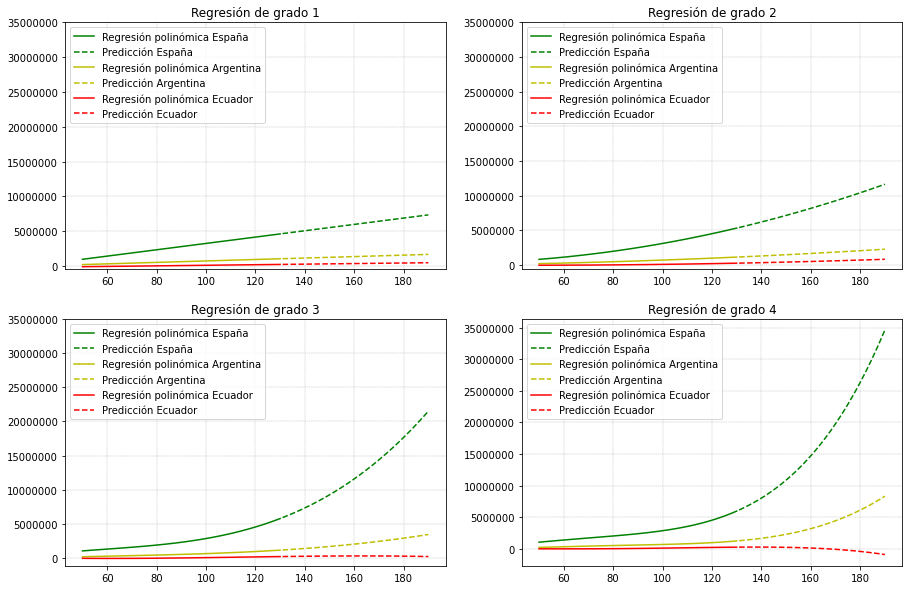

In [117]:
grado = 1

fig, axs = plt.subplots(2, 2,figsize=(15,10))
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])))
pred_x2 = list(range(max(df['fecha_no']),max(df['fecha_no'])+60))

for grado in range(4):
    p = np.poly1d(np.polyfit(xtrainE, ytrainE, grado+1))
    Ppred_y = p(pred_x)
    axs[int(grado/2),grado%2].plot(pred_x, Ppred_y, 'g-', label='Regresión polinómica España')
    Ppred_y = p(pred_x2)
    axs[int(grado/2),grado%2].plot(pred_x2, Ppred_y, 'g--', label='Predicción España')
    
    p = np.poly1d(np.polyfit(xtrainL, ytrainL, grado+1))
    Ppred_y = p(pred_x)
    axs[int(grado/2),grado%2].plot(pred_x, Ppred_y, 'y-', label='Regresión polinómica Argentina')
    Ppred_y = p(pred_x2)
    axs[int(grado/2),grado%2].plot(pred_x2, Ppred_y, 'y--', label='Predicción Argentina')

    p = np.poly1d(np.polyfit(xtrain, ytrain, grado+1))
    Ppred_y = p(pred_x)
    axs[int(grado/2),grado%2].plot(pred_x, Ppred_y, 'r-', label='Regresión polinómica Ecuador')
    Ppred_y = p(pred_x2)
    axs[int(grado/2),grado%2].plot(pred_x2, Ppred_y, 'r--', label='Predicción Ecuador')

    axs[int(grado/2),grado%2].legend(loc='upper left')
    axs[int(grado/2),grado%2].grid(linestyle='--', linewidth=0.4)
    axs[int(grado/2),grado%2].set_title("Regresión de grado " + str(grado+1))
    axs[int(grado/2),grado%2].set_yticks(np.arange(0, 40000000, step=5000000))
    try:
        axs[int(grado/2),grado%2].ticklabel_format(axis='y', style='plain')
    except AttributeError:
        print('')
plt.show()

### Identificar cual es la fecha tentativa en la que todos los Ecuatorianos podrán ser vacunados con las dos dosis.

In [81]:
no_ecuatorianos = 17370000

dias1 = 0
dias2 = 0
dias3 = 0
dias4 = 0

dia = 0

while (dias1==0 or dias2==0 or dias3==0 or dias4==0) and dia <= 5000:
    p = np.poly1d(np.polyfit(xtrain, ytrain, 1))
    if p(dia) >= no_ecuatorianos and dias1==0:
        dias1 = dia
    p = np.poly1d(np.polyfit(xtrain, ytrain, 2))
    if p(dia) >= no_ecuatorianos and dias2==0:
        dias2 = dia
    dia+=1
    
print('Número de días - regresión grado 1: ', dias1)
print('Número de días - regresión grado 2: ', dias2)

Número de días - regresión grado 1:  4308
Número de días - regresión grado 2:  717


In [90]:
date1 = datetime.strptime("12/29/2020", "%m/%d/%Y") + timedelta(days=dias1)
date2 = datetime.strptime("12/29/2020", "%m/%d/%Y") + timedelta(days=dias2)
print('Población totalmente vacunada (Regresión grado 1): ', date1)
print('Población totalmente vacunada (Regresión grado 2): ', date2)

Población totalmente vacunada (Regresión grado 1):  2032-10-15 00:00:00
Población totalmente vacunada (Regresión grado 2):  2022-12-16 00:00:00


### Opinión

De acuerdo con los datos presentados en este estudio, se logra apreciar cómo el Ecuador, en comparación con otros países en Latinoamérica o Europa, presenta un avance en el sistema de vacunación muy deficiente. Es por ello que en las predicciones realizadas para determinar el día en que toda la población será totalmente vacunada es, en el mejor de los casos, en diciembre del próximo año. 

### Conclusiones

Los modelos con regresiones polinómicas realizan mejores predicciones ya que se ajustan de mejor manera a los datos reales. Sin embargo, al aumentar el grado de la regresión polinómica podemos caer en un overfitting que nos arrojará resultados erróneos como en las predicciones realizadas con los datos de Ecuador para determinar la fecha en el que toda la población será vacunada. En ese caso, los modelos de grado 3 y 4 indican que el la cantidad de personas totalmente vacunadas tendrán valores negativos, por lo que sus resultados fueron despreciados al momento de presentar la fecha aproximada en el que toda la población será totalmente vacunada.  

### Recomendaciones

Se recomienda realizar un estudio futuro para analizar el impacto de la llegada de más vacunas al país en la cantidad de personas vacunadas totalmente.